# Set the Environment

## Install the Packages

In [1]:
!pip3 install matplotlib
!pip3 install numpy
!pip3 install pandas
!pip3 install keras==2.3.1
!pip3 install tensorflow==1.14.0
!pip3 install scikit-learn==0.24.0

## Import the Packages

In [2]:
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.models import Sequential, load_model
from keras.utils import np_utils
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

# Data Preparation

## Import the Dataset

In [3]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Change the Y Values

In [4]:
# seizure = 1
# no_seizure = 0

# raw_data['y'].replace(1, seizure, inplace=True)
# raw_data['y'].replace(2, no_seizure, inplace=True)
# raw_data['y'].replace(3, no_seizure, inplace=True)
# raw_data['y'].replace(4, no_seizure, inplace=True)
# raw_data['y'].replace(5, no_seizure, inplace=True)

## Split Dataset into Training Set and Test Set

In [5]:
# Percentage to split by for training
perc = 80
# Set for training the model
data = raw_data.head(int(len(raw_data) * (perc / 100)))
# Set for testing the model later to get the real accuracy
test_set = raw_data.tail(int(len(raw_data) * ((100 - perc) / 100)))

## Format the Data
    1. Split the data into Train and Test sets
    2. Get the data into the right shapes for training

In [6]:
x_values = data.values[:, 1:-1]
y_values = np.array(data['y'])
y_values = np_utils.to_categorical(y_values)
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=1)
x_train = x_train.reshape(-1, 178, 1)
x_test = x_test.reshape(-1, 178, 1)
print("X Train: {}\nX Test: {}\nY Train: {}\nY Test {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

X Train: (7360, 178, 1)
X Test: (1840, 178, 1)
Y Train: (7360, 6)
Y Test (1840, 6)


## Visualize the Dataset

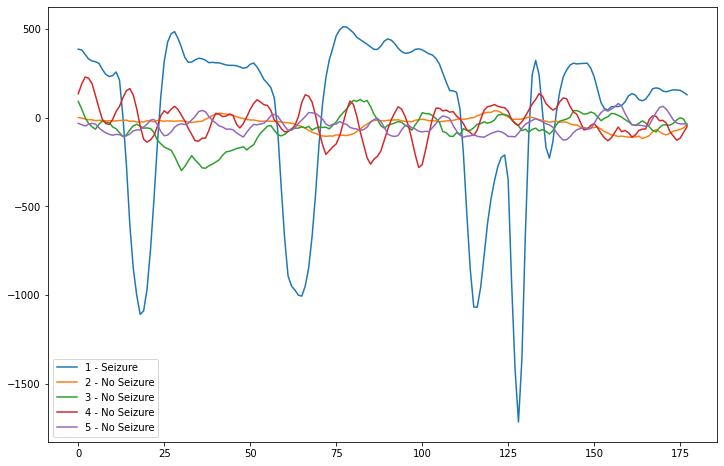

In [7]:
# Set the size of the chart
plt.figure(figsize=(12, 8))
# Plot data labeled 1 - Seizure
plt.plot(x_values[1, :], label="1 - Seizure")
# Plot data labeled 2 - No Seizure
plt.plot(x_values[7, :], label="2 - No Seizure")
# Plot data labeled 3 - No Seizure
plt.plot(x_values[12, :], label="3 - No Seizure")
# Plot data labeled 4 - No Seizure
plt.plot(x_values[0, :], label="4 - No Seizure")
# Plot data labeled 5 - No Seizure
plt.plot(x_values[2, :], label="5 - No Seizure")
# Create a legend and output the graph
plt.legend()
plt.show()

In [8]:
print(x_train.mean())
print(x_train.std())
print(x_test.mean())
print(x_test.std())

-7.458335368832437
164.55179507166253
-7.998668783585735
166.0583383002499


# Model Training

## Create a Custom Activation Function - Swish

In [9]:
def custom_activation(x, beta=2):
    """
    Define Swish Activation Function
    """
    return K.sigmoid(beta * x) * x


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

## Create a LSTM Model

In [10]:
# Create a Sequential LSTM model
model = Sequential()
model.add(LSTM(56, input_shape=(45, 1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation(custom_activation, name='Swish'))
#model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

# Output the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 89, 56)            12992     
_________________________________________________________________
dropout_1 (Dropout)          (None, 89, 56)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_2 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1140      
_________________________________________________________________
Swish (Activation)           (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

## Compile the LSTM Model

In [11]:
# Define the variables for training
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

## Train the LSTM Model

In [12]:
# Train the model
hist = model.fit(
    x=np.asarray((x_train[:, ::2] - x_train.mean()) / x_train.std()).astype(np.float32),
    y=np.asarray(y_train[:, 1:]).astype(np.float32),
    validation_data=(
        (x_test[:, ::2] - x_test.mean()) / x_test.std(),
        y_test[:, 1:]
    ),
    epochs=100,
    batch_size=15,
    shuffle=True
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7360 samples, validate on 1840 samples
Epoch 1/100
7360/7360 [==============================] - 32s 4ms/step - loss: 0.3999 - accuracy: 0.8304 - val_loss: 0.3795 - val_accuracy: 0.8338
Epoch 2/100
7360/7360 [==============================] - 32s 4ms/step - loss: 0.3807 - accuracy: 0.8330 - val_loss: 0.3887 - val_accuracy: 0.8285
Epoch 3/100
7360/7360 [==============================] - 31s 4ms/step - loss: 0.3732 - accuracy: 0.8345 - val_loss: 0.3693 - val_accuracy: 0.8338
Epoch 4/100
7360/7360 [==============================] - 31s 4ms/step - loss: 0.3686 - accuracy: 0.8338 - val_loss: 0.3677 - val_accuracy: 0.8324
Epoch 5/100
7360/7360 [==============================] - 31s 4ms/step - loss: 0.3579 - accuracy: 0.8346 - val_loss: 0.3524 - val_accuracy: 0.8365
Epoch 6/100
7360/7360 [==============================] - 31s 4ms/step - loss: 0.3116 - accuracy: 0.8513 - val_loss: 0.3080 - va

## Save the Model

In [13]:
model_name = "Seizure_Detector.h5"

model.save(model_name)

## Visualize Model's Accuracy Metrics

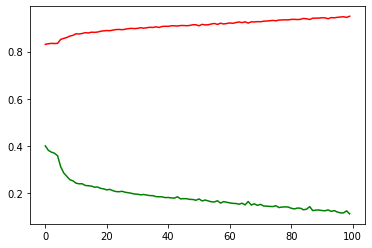

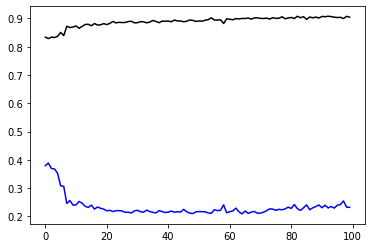

In [14]:
# Plot Training Loss and Accuracy of the Model
plt.figure(0)
plt.plot(hist.history['loss'], 'green')
plt.plot(hist.history['accuracy'], 'red')
plt.show()

# Plot Validation Loss and Accuracy of the Model
plt.figure(0)
plt.plot(hist.history['val_loss'], 'blue')
plt.plot(hist.history['val_accuracy'], 'black')
plt.show()

# Validate Accuracy of the Model

## Load the Model

In [15]:
model = load_model(model_name)

## Split the Test Set

In [16]:
x_test_values = test_set.values[:, 1:-1]
y_test_values = np.array(test_set['y'])
y_test_values = np_utils.to_categorical(y_test_values)
x_test_values = x_test_values.reshape(-1, 178, 1)
print("x_test_values Shape: {}\ny_test_values Shape: {}".format(x_test_values.shape, y_test_values.shape))

x_test_values Shape: (2300, 178, 1)
y_test_values Shape: (2300, 6)


## Predict

In [17]:
predictions = model.predict((x_test_values[:, ::2] - x_test_values.mean()) / x_test_values.std())

## Format the Data
    1. Get the data into the right input shapes for the predictions

In [18]:
y_pred = np.zeros((y_test_values.shape[0]))
y_truth = np.ones((y_test_values.shape[0]))

for i in range(y_test_values.shape[0]):
    y_pred[i] = np.argmax(predictions[i]) + 1
    y_truth[i] = np.argmax(y_test_values[i])

for i in range(y_test_values.shape[0]):
    if y_truth[i] != 5:
        y_truth[i] = 1
    if y_pred[i] != 5:
        y_pred[i] = 1

## Calculate the Accuracy

In [19]:
print("Accuracy of the Model: " + str(accuracy_score(y_truth, y_pred)))

Accuracy of the Model: 0.8973913043478261


# Try Against Other Data

In [20]:
dataset = pd.DataFrame(pd.read_csv('EEG_recording.csv'))
dataset.head()

FileNotFoundError: ignored

In [ ]:
row_1 = dataset['TP9']
row = pd.DataFrame(row_1)
#row = row.T
row

In [ ]:
row = row.iloc[0:178]
row = row.values.reshape(-1, 178, 1)

In [ ]:
predictions = model.predict((row[:, ::2] - row_1.mean()) / row_1.std())

In [ ]:
result = np.argmax(predictions[0]) + 1

In [ ]:
result